# Data Analysis Project: Fandango Movie Ratings

In this project, we want to determine wether the displayed ratings on <a href="https://www.fandango.com/">fandango.com</a> actually represent the internal ratings. <a href="https://fivethirtyeight.com/features/fandango-movies-ratings/">The data journalist Walt Hickey showed</a>, that the displayed ratings were inflated by being rounded up. Since then Fandango has claimed the reason for this was a bug. In this project, we want to analyze if the ratings have been corrected.
We will compare the <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">data Walt Hickey used</a> with <a href="https://github.com/mircealex/Movie_ratings_2016_17">a more recent data set</a>.

### 1. Import Data and Libraries

First, we import all libraries and data sets we will use. We get a first impression by looking at the top rows of each set.



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stat
from IPython.display import display
pd.options.display.max_columns = None

data1 = pd.read_csv("fandango_score_comparison.csv")
data2 = pd.read_csv("movie_ratings_16_17.csv")
display(data1.head())
display(data2.head())

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


### 2. Understanding the Data

The population of interest includes all rated movies on the website fadango.com. Our two data set represent two samples of this population taken at a different time. We want to make sure that these samples are representative of the data.
The requirements for Hickey's data set were that a movie needed to have 30+ ratings at the time of sampling (24.9.2015) as well as availability of tickets. Therefor the sample is not random but tied to conditions. 
The conditions for the second sample were: The movie must have been released in 2016 or earlier and it must have had a considerable amount of ratings and reviews.
We can assume, that the samples are not representative of the whole population. The goal of our project gets a slight adjustment: We want to find out, if the rating of 2016's most popular movies had a less significant bias towards positive ratings than the rating of 2015's most popular movie on fandango.com

### 3. Selecting relevant columns

Now we want to prepare the two data sets for the analysis. We want to select only the columns that contain relevant information. 

Data Set 1:
* FILM: The name of the movie
* Fandango_Stars: The number of stars the film had on its Fandango movie page
* Fandango_Ratingvalue: The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
* Fandango_votes: The number of user votes the film had on Fandango
* Fandango_Difference: The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

Data Set 2:
* movie: The name of the movie
* year: The release year of the movie
* fandango: The Fandango rating of the movie (user score)

In [59]:
cols1 = ["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]
cols2 = ["movie", "year", "fandango"]
data1 = data1[cols1]
data2 = data2[cols2]

### 4. Tailoring the Data Set

The two conditions for our samples are: 
1. Year released (2015/2016)
2. Number of ratings (30+)

We will select only rows, that fulfill these conditions. However, the second data set doesn't specify the number of ratings. We will take a random sample and check manually if at least 8 of 10 of those movies have 30+ ratings and the sample therefor can be representative for popular movies.

In [60]:
movies2015 = data1["FILM"].str.contains(r"(2015)")
data1 = data1[movies2015]
data2 = data2[data2["year"] == 2016]
print(data1["Fandango_votes"].sort_values())
sample = data2.sample(10)
display(sample)

39        35
122       36
71        38
43        38
145       41
       ...  
140    15749
73     33538
72     34085
130    34390
97     34846
Name: Fandango_votes, Length: 129, dtype: int64


C:\Users\sek\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,movie,year,fandango
55,Finding Dory,2016,4.5
115,Money Monster,2016,4.0
173,The Edge of Seventeen,2016,4.0
70,How to Be Single,2016,4.0
156,Teenage Mutant Ninja Turtles: Out of the Shadows,2016,4.0
22,Ben-Hur,2016,4.0
147,Snowden,2016,4.0
201,Trolls,2016,4.5
75,Ice Age: Collision Course,2016,4.0
204,War Dogs,2016,4.0


* Gods of Egypt: 31,774
* Why Him?: 22,300
* Assasin's Creed: 57,380
* I.T.: 782
* Zootopia: 101,291
* Bleed fo This: 8,835
* Jason Bourne: 56,818
* Central Intelligence: 54,312
* Me Before You: 30,626
* Eddie the Eagle: 22,853

The sample suggests, that our data set is representative of popular movies. 


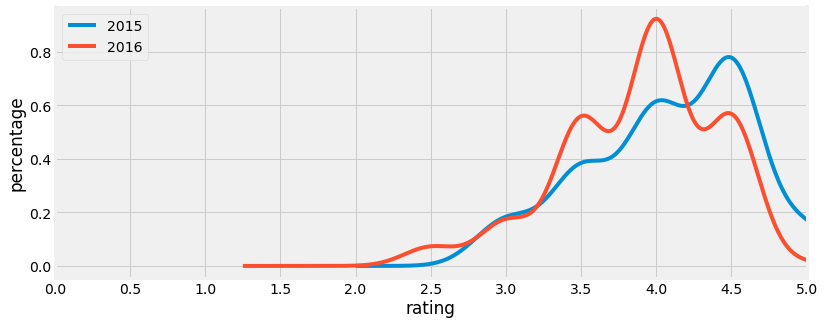

In [61]:
fig = plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
ax1 = data1["Fandango_Stars"].plot.kde(label="2015")
ax2 = data2["fandango"].plot.kde(label="2016")
ax1.set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) 
plt.xlim(0,5)
plt.xlabel("rating")
plt.ylabel("percentage")
plt.legend(loc="upper left")

We can see on the Kernel Density Plot, that the ratings for 2016 movies are actually lower than the ratings for 2015 movies.
There were no ratings below 3.0 in 2015, but there are some 2.5 ratings in 2016. There are also less 4.5 or higher rated movies in 2016, but the amount of 3.5 and 4.0 has increased. Now we want to properly look at the numbers to see, how ratings have changed.

In [62]:
proportions2015 = round(data1["Fandango_Stars"].value_counts(normalize = True), 2).sort_values()
proportions2016 = round(data2["fandango"].value_counts(normalize = True), 2).sort_values()
print("2015:\n",proportions2015, "\n2016:\n", proportions2016)
mean15 = data1["Fandango_Stars"].agg(np.mean)
median15 = data1["Fandango_Stars"].agg(np.median)
mode15 = stat.mode(data1["Fandango_Stars"])
mean16 = data2["fandango"].agg(np.mean)
median16 = data2["fandango"].agg(np.median)
mode16 = stat.mode(data2["fandango"])

print("\n2015\nMean:", mean15, "\nMedian:", median15, "\nMode:", mode15, "\n2016:\nMean:", mean16, "\nMedian:", median16, 
      "\nMode:", mode16)   

2015:
 5.0    0.07
3.0    0.09
3.5    0.18
4.0    0.29
4.5    0.38
Name: Fandango_Stars, dtype: float64 
2016:
 5.0    0.01
2.5    0.03
3.0    0.07
3.5    0.24
4.5    0.25
4.0    0.40
Name: fandango, dtype: float64

2015
Mean: 4.0852713178294575 
Median: 4.0 
Mode: 4.5 
2016:
Mean: 3.887434554973822 
Median: 4.0 
Mode: 4.0


In 2015 4.5 Stars was the most common rating (38 %), which decreased by 14 percent points to 25 %. The second most common rating was 4.0 Stars (29 %), which increased by 11 percent points to 40 % in 2016.

The average rating changed from 4.08 to 3.89. The median is 4.0 for both distributions, but the Mode changed from 4.5 to 4.0.



,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


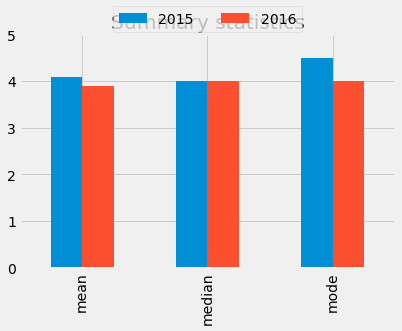

In [67]:
summary = pd.DataFrame({"2015": [mean15, median15, mode15], "2016": [mean16, median16, mode16]}, 
                       index=["mean", "median", "mode"])

display(summary)

summary.plot.bar()
plt.ylim(0,5)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()